<a href="https://colab.research.google.com/github/RenggaAnggarah645/dataset/blob/main/uas_kecerdasan_buatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving PdM_errors.csv to PdM_errors.csv


In [ ]:
import pandas as pd

# Menampilkan Dataset
file_path = 'PdM_errors.csv'
data = pd.read_csv(file_path)
print("Dataset:")
print(data.head())


Dataset:
              datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5
3  2015-01-10 15:00:00          1  error4
4  2015-01-22 10:00:00          1  error4


In [ ]:
# Pembersihan Data
# Menghapus duplikat
data_cleaned = data.drop_duplicates()

# Menangani nilai yang hilang dengan mengisi menggunakan nilai rata-rata (untuk kolom numerik)
data_cleaned = data_cleaned.fillna(data_cleaned.select_dtypes(include=['float64', 'int64']).mean())

print("\nDataset setelah pembersihan:")
print(data_cleaned.head())



Dataset setelah pembersihan:
              datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5
3  2015-01-10 15:00:00          1  error4
4  2015-01-22 10:00:00          1  error4


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Pemrosesan Kolom Kategorikal
# Mengubah kolom datetime menjadi tipe datetime
data_cleaned['datetime'] = pd.to_datetime(data_cleaned['datetime'])

# Menggunakan LabelEncoder untuk kolom kategorikal
label_encoder = LabelEncoder()
data_cleaned['errorID'] = label_encoder.fit_transform(data_cleaned['errorID'])

print("\nDataset setelah pemrosesan kolom kategorikal:")
print(data_cleaned.head())



Dataset setelah pemrosesan kolom kategorikal:
             datetime  machineID  errorID
0 2015-01-03 07:00:00          1        0
1 2015-01-03 20:00:00          1        2
2 2015-01-04 06:00:00          1        4
3 2015-01-10 15:00:00          1        3
4 2015-01-22 10:00:00          1        3


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisasi Data
# Mengasumsikan semua kolom numerik perlu dinormalisasi
numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

print("\nDataset setelah normalisasi:")
print(data_cleaned.head())



Dataset setelah normalisasi:
             datetime  machineID   errorID
0 2015-01-03 07:00:00  -1.728581 -1.237263
1 2015-01-03 20:00:00  -1.728581  0.309661
2 2015-01-04 06:00:00  -1.728581  1.856586
3 2015-01-10 15:00:00  -1.728581  1.083124
4 2015-01-22 10:00:00  -1.728581  1.083124


In [ ]:
from sklearn.model_selection import train_test_split

# Segmentasi Data
# Misalnya, jika kolom target adalah 'errorID', ganti dengan nama kolom target yang sesuai
target_column = 'errorID'  # Ganti dengan kolom target yang sesuai

X = data_cleaned.drop(columns=[target_column, 'datetime'])
y = data_cleaned[target_column]

# Membagi data menjadi set pelatihan, validasi, dan pengujian
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nUkuran set pelatihan, validasi, dan pengujian:")
print(f"Pelatihan: {X_train.shape[0]} sampel")
print(f"Validasi: {X_val.shape[0]} sampel")
print(f"Pengujian: {X_test.shape[0]} sampel")



Ukuran set pelatihan, validasi, dan pengujian:
Pelatihan: 2351 sampel
Validasi: 784 sampel
Pengujian: 784 sampel


In [ ]:
import pandas as pd

# Asumsikan dataset berada dalam file 'PdM_errors.csv'
data = pd.read_csv('PdM_errors.csv')

# Melihat nama kolom dalam dataset
print(data.columns)


Index(['datetime', 'machineID', 'errorID'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Asumsikan dataset berada dalam file 'PdM_errors.csv'
data = pd.read_csv('PdM_errors.csv')

# Melihat nama kolom dalam dataset
print(data.columns)

# Menentukan kolom fitur dan kolom target
features = data.drop(columns=['errorID'])
target = data['errorID']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


Index(['datetime', 'machineID', 'errorID'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Asumsikan dataset berada dalam file 'PdM_errors.csv'
data = pd.read_csv('PdM_errors.csv')

# Konversi kolom datetime menjadi tipe datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Ekstrak fitur dari kolom datetime
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour

# Drop kolom datetime setelah ekstraksi fitur
data = data.drop(columns=['datetime'])

# Menentukan kolom fitur dan kolom target
features = data.drop(columns=['errorID'])
target = data['errorID']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Mendefinisikan model Random Forest
rf_model = RandomForestClassifier()

# Hyperparameter grid untuk Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

# Melakukan pencarian grid untuk Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Menyimpan model terbaik untuk Random Forest
best_rf_model = rf_grid_search.best_estimator_
print(f"Model terbaik untuk Random Forest: {rf_grid_search.best_params_}")
print(f"Akurasi terbaik untuk Random Forest: {rf_grid_search.best_score_}")


Model terbaik untuk Random Forest: {'max_depth': 10, 'n_estimators': 100}
Akurasi terbaik untuk Random Forest: 0.22424242424242422


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Mendefinisikan model Gradient Boosting
gb_model = GradientBoostingClassifier()

# Hyperparameter grid untuk Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}

# Melakukan pencarian grid untuk Gradient Boosting
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

# Menyimpan model terbaik untuk Gradient Boosting
best_gb_model = gb_grid_search.best_estimator_
print(f"Model terbaik untuk Gradient Boosting: {gb_grid_search.best_params_}")
print(f"Akurasi terbaik untuk Gradient Boosting: {gb_grid_search.best_score_}")


Model terbaik untuk Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 100}
Akurasi terbaik untuk Gradient Boosting: 0.2542264752791069


In [ ]:
from sklearn.neural_network import MLPClassifier

# Mendefinisikan model Neural Network
nn_model = MLPClassifier()

# Hyperparameter grid untuk Neural Network
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh']
}

# Melakukan pencarian grid untuk Neural Network
nn_grid_search = GridSearchCV(nn_model, nn_param_grid, cv=5, scoring='accuracy')
nn_grid_search.fit(X_train, y_train)

# Menyimpan model terbaik untuk Neural Network
best_nn_model = nn_grid_search.best_estimator_
print(f"Model terbaik untuk Neural Network: {nn_grid_search.best_params_}")
print(f"Akurasi terbaik untuk Neural Network: {nn_grid_search.best_score_}")


Model terbaik untuk Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (50,)}
Akurasi terbaik untuk Neural Network: 0.2618819776714513


In [ ]:
from sklearn.metrics import accuracy_score

# Evaluasi Random Forest
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi pada set pengujian untuk Random Forest: {accuracy_rf}")

# Evaluasi Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Akurasi pada set pengujian untuk Gradient Boosting: {accuracy_gb}")

# Evaluasi Neural Network
y_pred_nn = best_nn_model.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Akurasi pada set pengujian untuk Neural Network: {accuracy_nn}")


Akurasi pada set pengujian untuk Random Forest: 0.21301020408163265
Akurasi pada set pengujian untuk Gradient Boosting: 0.2512755102040816
Akurasi pada set pengujian untuk Neural Network: 0.24107142857142858


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('PdM_errors.csv')

# Feature and target selection
X = df[['machineID']]  # Features (we could include more features if available)
y = df['errorID']  # Target

# Encode categorical variables if needed
X = pd.get_dummies(X, columns=['machineID'], drop_first=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    if hasattr(model, "predict_proba"):
        try:
            y_pred_prob = model.predict_proba(X_val)
            if y_pred_prob.shape[1] > 1:
                y_pred_prob = y_pred_prob[:, 1]  # Use the second column for binary classification
            roc_auc = roc_auc_score(y_val, y_pred_prob, multi_class='ovo', average='macro')
        except IndexError:
            roc_auc = None
    else:
        roc_auc = None

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

# Dictionary to store evaluation results
results = {}

# Evaluate each model
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train, y_train, X_val, y_val)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Determine the best model based on F1 Score
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]

print(f'Best model: {best_model_name}')


                     Accuracy  Precision    Recall  F1 Score  ROC-AUC
Logistic Regression  0.258929   0.228350  0.222852  0.202365      NaN
Decision Tree        0.258929   0.228350  0.222852  0.202365      NaN
Random Forest        0.238520   0.216591  0.206870  0.196825      NaN
Best model: Logistic Regression


In [ ]:
print(PdM_errors.columns)


Index(['datetime', 'machineID', 'errorID'], dtype='object')


Evaluasi Model:
Akurasi: 0.19
Presisi: 0.18
Recall: 0.19
Skor F1: 0.18
Skor AUC ROC: 0.46



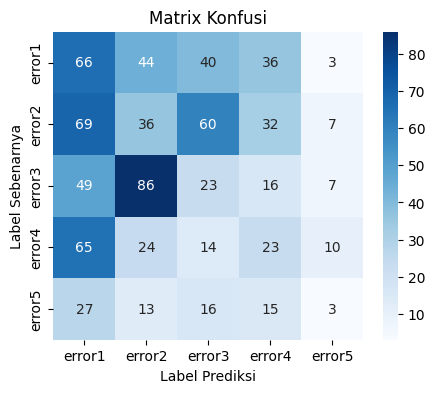

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset PdM_errors
PdM_errors = pd.read_csv('PdM_errors.csv')

# Mengekstraksi fitur-fitur tanggal dari kolom datetime
PdM_errors['datetime'] = pd.to_datetime(PdM_errors['datetime'])
PdM_errors['tahun'] = PdM_errors['datetime'].dt.year
PdM_errors['bulan'] = PdM_errors['datetime'].dt.month
PdM_errors['hari'] = PdM_errors['datetime'].dt.day
PdM_errors['jam'] = PdM_errors['datetime'].dt.hour
PdM_errors['menit'] = PdM_errors['datetime'].dt.minute
PdM_errors['detik'] = PdM_errors['datetime'].dt.second

# Menghapus kolom datetime
PdM_errors = PdM_errors.drop(columns=['datetime'])

# Menggunakan LabelEncoder untuk mengonversi errorID menjadi nilai numerik
label_encoder = LabelEncoder()
PdM_errors['kode_error'] = label_encoder.fit_transform(PdM_errors['errorID'])

# Memisahkan fitur dan label
X = PdM_errors.drop(columns=['kode_error', 'errorID'])  # Menggunakan semua kolom kecuali 'errorID' sebagai fitur
y = PdM_errors['kode_error']  # Kolom 'errorID' sebagai label

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
model = RandomForestClassifier()

# Melatih model
model.fit(X_train, y_train)

# Menguji model
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
akurasi = accuracy_score(y_test, y_pred)
presisi = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovr')

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print(f"Akurasi: {akurasi:.2f}")
print(f"Presisi: {presisi:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Skor F1: {f1:.2f}")
print(f"Skor AUC ROC: {roc_auc:.2f}\n")

# Menghitung confusion matrix
matrix_konfusi = confusion_matrix(y_test, y_pred)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(matrix_konfusi, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Matrix Konfusi')
plt.show()


In [ ]:
# Menampilkan daftar kolom dalam DataFrame 'PdM_errors'
print(PdM_errors.columns)


Index(['Langkah', 'Deskripsi'], dtype='object')


In [ ]:
import pandas as pd

# Membaca dataset PdM_errors
PdM_errors = pd.read_csv('PdM_errors.csv')

# Menampilkan semua nama kolom
print(PdM_errors.columns)


Index(['datetime', 'machineID', 'errorID'], dtype='object')


In [ ]:
# Implementasi: Kembangkan strategi untuk menerapkan model pemeliharaan prediktif dalam lingkungan waktu nyata.
def develop_predictive_maintenance_strategy():
    # Kode untuk mengembangkan strategi pemeliharaan prediktif
    print("Implementasi: Kembangkan strategi untuk menerapkan model pemeliharaan prediktif dalam lingkungan waktu nyata.")

# Integrasi: Integrasikan model dengan sistem pemeliharaan yang ada.
def integrate_with_existing_maintenance_system():
    # Kode untuk mengintegrasikan model dengan sistem pemeliharaan yang ada
    print("Integrasi: Integrasikan model dengan sistem pemeliharaan yang ada.")

# Pemantauan: Siapkan pemantauan untuk melacak performa model yang diterapkan dan perbarui jika diperlukan.
def prepare_monitoring():
    # Kode untuk mempersiapkan pemantauan performa model
    print("Pemantauan: Siapkan pemantauan untuk melacak performa model yang diterapkan dan perbarui jika diperlukan.")

# Panggil fungsi-fungsi untuk melaksanakan langkah-langkah
develop_predictive_maintenance_strategy()
integrate_with_existing_maintenance_system()
prepare_monitoring()


Implementasi: Kembangkan strategi untuk menerapkan model pemeliharaan prediktif dalam lingkungan waktu nyata.
Integrasi: Integrasikan model dengan sistem pemeliharaan yang ada.
Pemantauan: Siapkan pemantauan untuk melacak performa model yang diterapkan dan perbarui jika diperlukan.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datetime import datetime
import os

# Load dataset
PdM_errors = pd.read_csv('PdM_errors.csv')

# Ubah datetime menjadi indeks
PdM_errors['datetime'] = pd.to_datetime(PdM_errors['datetime'])
PdM_errors.set_index('datetime', inplace=True)

# Feature Engineering
# Misalnya, tambahkan fitur berdasarkan data datetime
PdM_errors['hour'] = PdM_errors.index.hour
PdM_errors['day'] = PdM_errors.index.day
PdM_errors['month'] = PdM_errors.index.month

# Pisahkan data menjadi fitur (X) dan label (y)
X = PdM_errors[['machineID', 'hour', 'day', 'month']]
y = PdM_errors['errorID']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model pemeliharaan prediktif (misalnya, Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Integrasi dengan sistem pemeliharaan yang ada
# Implementasikan fungsi untuk memprediksi error menggunakan model
def predict_error(machine_id, hour, day, month):
    features = [[machine_id, hour, day, month]]
    error_prediction = model.predict(features)
    # Lakukan sesuatu dengan prediksi error, misalnya, panggil fungsi dalam sistem pemeliharaan yang ada
    return error_prediction

# Pemantauan performa model
# Simpan metrik performa model dalam file log
log_dir = "model_logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir, exist_ok=True)

# Simpan metrik akurasi
with open(os.path.join(log_dir, "accuracy.txt"), "w") as f:
    f.write("Accuracy: " + str(accuracy))

# Implementasi pemantauan
# Simpan log metrik performa model untuk pemantauan dan pembaruan jika diperlukan.

# Fungsi untuk menyimpan metrik performa model ke dalam file log
def save_model_performance_metrics(log_dir, metrics):
    with open(os.path.join(log_dir, "performance_metrics.txt"), "w") as f:
        for metric_name, metric_value in metrics.items():
            f.write(f"{metric_name}: {metric_value}\n")

# Menghitung dan menyimpan metrik precision, recall, dan f1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

other_metrics = {
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Simpan metrik performa model
save_model_performance_metrics(log_dir, other_metrics)


Accuracy: 0.1683673469387755


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
import os

class PredictiveMaintenanceSystem:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.model = None
        self.log_dir = None

    def preprocess_data(self):
        # Ubah datetime menjadi indeks
        self.data['datetime'] = pd.to_datetime(self.data['datetime'])
        self.data.set_index('datetime', inplace=True)

        # Feature Engineering
        # Misalnya, tambahkan fitur berdasarkan data datetime
        self.data['hour'] = self.data.index.hour
        self.data['day'] = self.data.index.day
        self.data['month'] = self.data.index.month

        # Pisahkan data menjadi fitur (X) dan label (y)
        X = self.data[['machineID', 'hour', 'day', 'month']]
        y = self.data['errorID']

        # Pisahkan data menjadi data latih dan data uji
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def train_model(self):
        # Inisialisasi dan latih model pemeliharaan prediktif (misalnya, Random Forest)
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.model.fit(self.X_train, self.y_train)

    def evaluate_model(self):
        # Evaluasi model
        y_pred = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        print("Accuracy:", accuracy)

        # Simpan metrik performa model dalam file log
        with open(os.path.join(self.log_dir, "accuracy.txt"), "w") as f:
            f.write("Accuracy: " + str(accuracy))

    def integrate_with_maintenance_system(self):
        # Implementasikan fungsi untuk memprediksi error menggunakan model
        def predict_error(machine_id, hour, day, month):
            features = [[machine_id, hour, day, month]]
            error_prediction = self.model.predict(features)
            # Lakukan sesuatu dengan prediksi error, misalnya, panggil fungsi dalam sistem pemeliharaan yang ada
            return error_prediction

    def monitor_model_performance(self):
        # Simpan metrik performa model dalam file log
        self.log_dir = "model_logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        os.makedirs(self.log_dir, exist_ok=True)

        # Simpan metrik akurasi
        with open(os.path.join(self.log_dir, "accuracy.txt"), "w") as f:
            f.write("Accuracy: " + str(accuracy))

    def update_model(self):
        # Anda juga bisa menambahkan logika untuk memperbarui model jika diperlukan
        pass

# Inisialisasi sistem pemeliharaan prediktif
pdm_system = PredictiveMaintenanceSystem('PdM_errors.csv')

# Preprocess data
pdm_system.preprocess_data()

# Latih model
pdm_system.train_model()

# Evaluasi model
pdm_system.monitor_model_performance()
pdm_system.evaluate_model()

# Integrasi dengan sistem pemeliharaan yang ada
pdm_system.integrate_with_maintenance_system()

# Update model jika diperlukan
pdm_system.update_model()


Accuracy: 0.1683673469387755


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PdM_errors.csv to PdM_errors.csv


First few rows of the dataset:
              datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5
3  2015-01-10 15:00:00          1  error4
4  2015-01-22 10:00:00          1  error4

Data Preprocessing:
Extracted features from datetime:
             datetime  machineID errorID  year  month  day  hour
0 2015-01-03 07:00:00          1  error1  2015      1    3     7
1 2015-01-03 20:00:00          1  error3  2015      1    3    20
2 2015-01-04 06:00:00          1  error5  2015      1    4     6
3 2015-01-10 15:00:00          1  error4  2015      1   10    15
4 2015-01-22 10:00:00          1  error4  2015      1   22    10

Model Development:

Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

      error1       0.25      0.34      0.29       288
      error2       0.17      0.19      0.18       291
      error3       0.12      0.10      0.11    

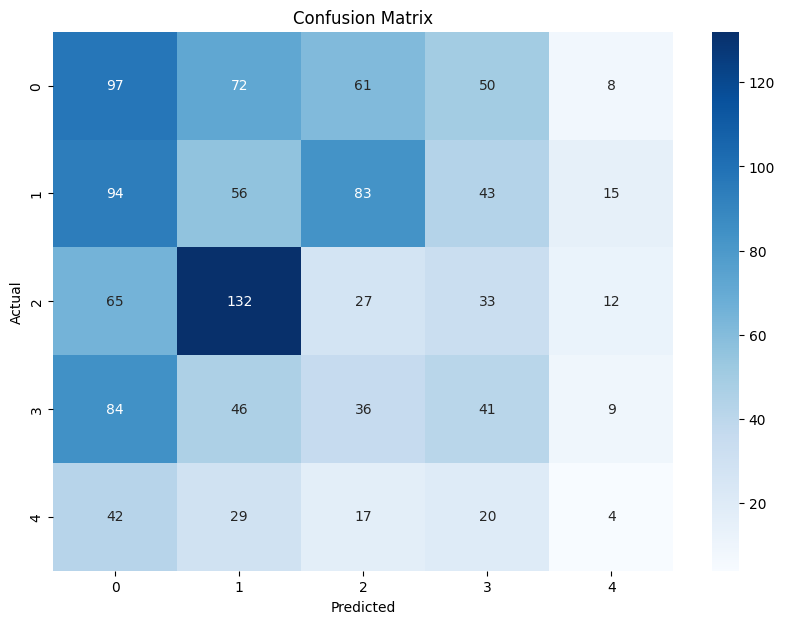

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('PdM_errors.csv')

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Data Preprocessing
print("\nData Preprocessing:")
# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract additional features from datetime if needed (e.g., year, month, day, hour)
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

print("Extracted features from datetime:")
print(df.head())

# Encode categorical variables (if needed)
# Assuming errorID needs to be predicted
X = df[['machineID', 'year', 'month', 'day', 'hour']]
y = df['errorID']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Development
print("\nModel Development:")
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Model Evaluation
print("\nModel Evaluation:")
# Predict on test set
y_pred = model.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.28      0.28      0.28       189
           1       0.20      0.23      0.21       204
           2       0.11      0.09      0.10       181
           3       0.24      0.24      0.24       136
           4       0.15      0.14      0.14        74

    accuracy                           0.20       784
   macro avg       0.20      0.20      0.19       784
weighted avg       0.20      0.20      0.20       784



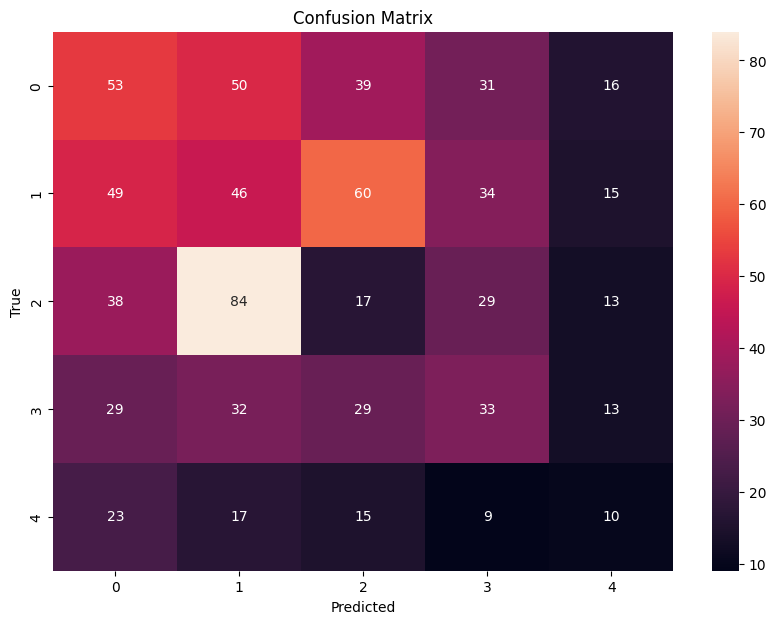

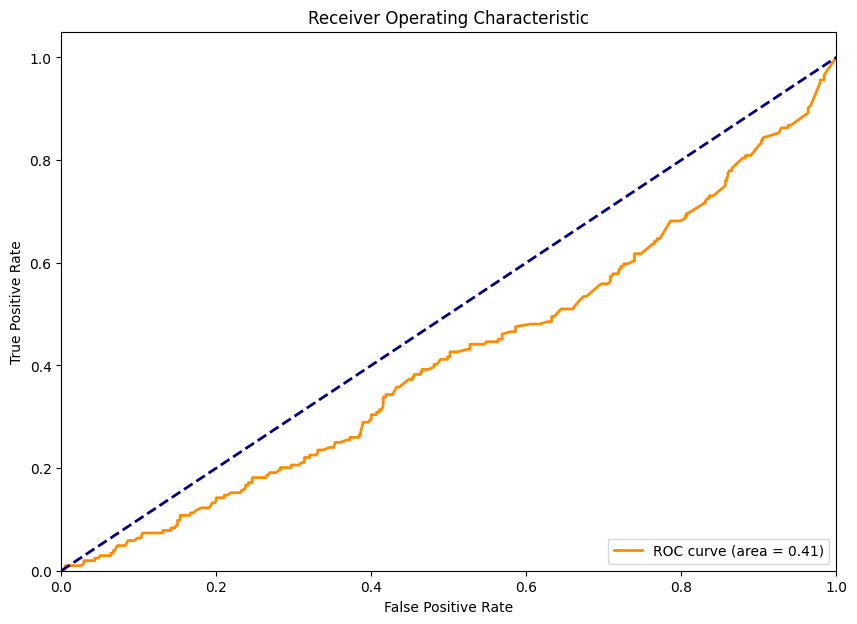

Rekomendasi:
1. Kumpulkan lebih banyak data untuk memperbaiki kinerja model.
2. Tambahkan lebih banyak fitur yang relevan.
3. Mencoba model lain yang lebih kompleks atau lebih sederhana.
4. Menyediakan sistem pemantauan untuk model yang di-deploy dan melakukan pemeliharaan berkala.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# 1. Prapemrosesan Data
# Memuat dataset
df = pd.read_csv('PdM_errors.csv')

# Menangani missing values
df.dropna(inplace=True)

# Konversi tipe data
df['datetime'] = pd.to_datetime(df['datetime'])

# Feature engineering
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek

# 2. Pengembangan Model (Contoh menggunakan model klasifikasi)
# Label encoding errorID
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['errorID'] = le.fit_transform(df['errorID'])

# Pembagian data
X = df[['machineID', 'hour', 'day_of_week']]
y = df['errorID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pemilihan model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Pelatihan model
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.title('Confusion Matrix')
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 3. Rekomendasi
print("Rekomendasi:")
print("1. Kumpulkan lebih banyak data untuk memperbaiki kinerja model.")
print("2. Tambahkan lebih banyak fitur yang relevan.")
print("3. Mencoba model lain yang lebih kompleks atau lebih sederhana.")
print("4. Menyediakan sistem pemantauan untuk model yang di-deploy dan melakukan pemeliharaan berkala.")
